# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | We had a Premium Economy retur...
1,✅ Trip Verified | I should like to review my ...
2,✅ Trip Verified | We have flown with British A...
3,✅ Trip Verified | I sat in the plane at Vienna...
4,✅ Trip Verified | It is almost 11pm we were su...


In [6]:
df

,reviews
0,Not Verified | We had a Premium Economy retur...
1,✅ Trip Verified | I should like to review my ...
2,✅ Trip Verified | We have flown with British A...
3,✅ Trip Verified | I sat in the plane at Vienna...
4,✅ Trip Verified | It is almost 11pm we were su...
...,...
995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...
996,✅ Trip Verified | I paid an extra £500 for tw...
997,✅ Trip Verified | Faro to Heathrow. Flight wa...
998,✅ Trip Verified | Vancouver to London. An exce...


In [8]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Removing the parts before | in the review column

In [9]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [10]:
df

,reviews
0,We had a Premium Economy return flight Los A...
1,I should like to review my flight with Briti...
2,We have flown with British Airways a few time...
3,I sat in the plane at Vienna airport for thre...
4,It is almost 11pm we were supposed to take of...
...,...
995,"Gatwick to Dubrovnik. Overcrowded lounges, b..."
996,I paid an extra £500 for two Premium economy...
997,Faro to Heathrow. Flight was very good no is...
998,Vancouver to London. An excellent flight on B...


#### Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

### Data Preprocessing steps are:

1) Cleaning the text
2) Tokenization
3) POS tagging
4) Stopword Removals
5) Obtaining the stem words

## Step1: Cleaning the text 

In [11]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...
1,I should like to review my flight with Briti...,I should like to review my flight with Britis...
2,We have flown with British Airways a few time...,We have flown with British Airways a few time...
3,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...
4,It is almost 11pm we were supposed to take of...,It is almost pm we were supposed to take off ...


## Step2: Tokenization 

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## Step3: Enrichment - POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step4: Stopwords removal 

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

## Step5: Obtaining the steam words  

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [13]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [15]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head() 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli..."
1,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British..."
2,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time..."
3,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ..."
4,It is almost 11pm we were supposed to take of...,It is almost pm we were supposed to take off ...,"[(almost, r), (pm, None), (supposed, v), (take..."


In [16]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...
1,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...
2,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...
3,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ...",sit plane Vienna airport three hour take arr...
4,It is almost 11pm we were supposed to take of...,It is almost pm we were supposed to take off ...,"[(almost, r), (pm, None), (supposed, v), (take...",almost pm suppose take still sit plane airpo...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,We had a Premium Economy return flight Los A...,Premium Economy return flight Los Angeles Lo...
1,I should like to review my flight with Briti...,like review flight British Airways Hannover ...
2,We have flown with British Airways a few time...,fly British Airways time last trip far bad e...
3,I sat in the plane at Vienna airport for thre...,sit plane Vienna airport three hour take arr...
4,It is almost 11pm we were supposed to take of...,almost pm suppose take still sit plane airpo...
...,...,...
995,"Gatwick to Dubrovnik. Overcrowded lounges, b...",Gatwick Dubrovnik Overcrowded lounge busines...
996,I paid an extra £500 for two Premium economy...,pay extra two Premium economy seat long haul...
997,Faro to Heathrow. Flight was very good no is...,Faro Heathrow Flight good issue yet baggage ...
998,Vancouver to London. An excellent flight on B...,Vancouver London excellent flight BA travel ...


## Sentiment Analysis using VADER 

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [19]:
!pip install vaderSentiment

   -------------------------------------- 126.0/126.0 kB 676.7 kB/s eta 0:00:00


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [21]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [22]:
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [23]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...,-0.3538,Negative
1,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...,0.9867,Positive
2,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...,0.1531,Neutral
3,I sat in the plane at Vienna airport for thre...,I sat in the plane at Vienna airport for thre...,"[(sat, v), (plane, n), (Vienna, n), (airport, ...",sit plane Vienna airport three hour take arr...,0.0000,Neutral
4,It is almost 11pm we were supposed to take of...,It is almost pm we were supposed to take off ...,"[(almost, r), (pm, None), (supposed, v), (take...",almost pm suppose take still sit plane airpo...,-0.2023,Negative


In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    471
Negative    419
Neutral     110
Name: Analysis, dtype: int64

## Visual Representation 

([<matplotlib.patches.Wedge at 0x1bf0abce070>,
 [Text(0.10007827270333483, 1.0954379669030634, 'Positive'),
  Text(-0.465228145639162, -0.9967761897763945, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(0.054588148747273545, 0.5975116183107618, '47.1%'),
  Text(-0.25376080671227014, -0.5436961035143969, '41.9%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

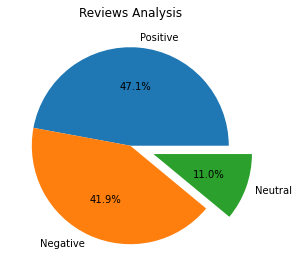

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [26]:
df.to_csv("BA_reviews.csv")

# Word Cloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

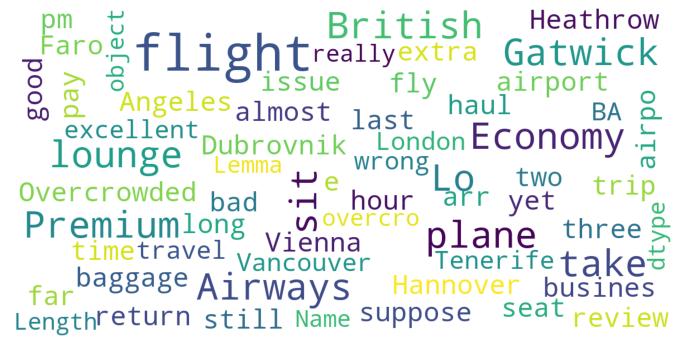

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)